[View in Colaboratory](https://colab.research.google.com/github/lewisliching/Fashion_MNIST_with_Keras/blob/master/Fashion_MNIST_with_Keras.ipynb)

##Fashion MNIST with Keras for getting start of Google Colab

- Take Fashion MNIST with Keras as example of getting start Deep learning in Google Colab and Google Drive

- Each Fashion image is 28 x 28 = 784 pixels in total.
- Each pixel value is an integer between 0 and 255 with higher for darker.
- In the csv dataset, each row is consist of  1 columns(1st column as label) and 784 columns (as 784 pixels of one image)
- labels of 1st column is as follows:
  0.	T-shirt/top
  1.	Trouser
  2.	Pullover
  3.	Dress
  4.	Coat
  5.	Sandal
  6.	Shirt
  7.	Sneaker
  8.	Bag
  9.	Ankle boot

- 60000 images in fashion-mnist_train.csv
- 10000 images in fashion-mnist_test.csv


- Reference:

 - https://www.kaggle.com/zalando-research/fashionmnist/home
 - https://github.com/zalandoresearch/fashion-mnist

##Set up Working environemnt of Google Colab and Google drive

- Supposed Tensorflow is ready under Googel Colab

- Don't forget to set Python 3 and using GPU as accelerator in Google Colab

- Install Keras, in which Numpy....libraries are updated as well

- Install PyDrive for accessing Google drive and authorize Google Colab to access files

In [1]:
!pip install keras
!pip install -U -q PyDrive

##Connect Google drive for CSV files

- Authenticate and create the PyDrive client and it will prompt for unique key of verify Google Colab can have access to Google Drive. Just click and copy the unique key and copy to the blank

- Copy the Folder ID from URL bar of that folder

- All files in that folder are listed with file ID in the format of title: xxx.csv, id: xxx

- Use the files ID to open and load files into Google colab and create filename accordingly

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# list out files in folder of Google drive
file_list = drive.ListFile({'q': "'1xt6pBbi0fLeFeUqc4OuwD0SciUad9jhf' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

# Load files into Google colab
train_downloaded = drive.CreateFile({'id': '1nX2Igu-Yyk6s0PzRa6HXmJnovq_lD3P9'})
train_downloaded.GetContentFile('fashion-mnist_train.csv')  
test_downloaded = drive.CreateFile({'id': '1BQt3R3xe83Iiw2GQx7z_PrALfAmD7d4M'})
test_downloaded.GetContentFile('fashion-mnist_test.csv')

print('Files are loaded into Colab')

title: fashion-mnist_test.csv, id: 1BQt3R3xe83Iiw2GQx7z_PrALfAmD7d4M
title: fashion-mnist_train.csv, id: 1nX2Igu-Yyk6s0PzRa6HXmJnovq_lD3P9
Files are loaded into Colab


##Import CSV file into DataFrame(Pandas) from Colab

- Using Pandas read_csv to read file in raw format

- Printout header (1st 5 row) of DataFrame(df) for double checking (1st column label = 2 9 6 0 3)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

# check df by printout 1st 5 rows
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load DataFrame (Pandas) to Array (Numpy) for further data analysis

- A Series object in pandas represents a one-dimensional labeled indexed array based on the NumPy ndarray. 

- NumPy allows us to work with high-performance N-dimensional array for selecting array elements, logical operations, slicing, reshaping, combining(stacking), splitting...etc.

- A series object is more efficient than using  N-dimensional for aligning data or label matching while N-dimensional array is more efficient in data manipulation. Thus, this is the reason why we load data from Data Frame to Array with:

  1. Data Splitting (X & Y for both train data and test data)
  2. Data Normalization by 255 (range of 0 - 255 integer of each pixel)
  3. Print out dimension of arrays for double checking
  4. Print out one of image of x_train for double checking (any number e.g. 50000)

x_train: (60000, 784)
y_train: (60000,)
 x_test: (10000, 784)
 y_test: (10000,)


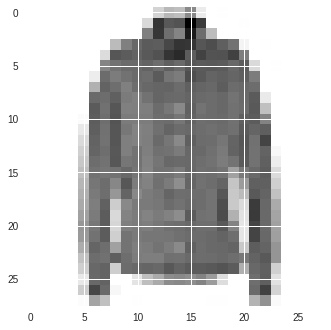

In [4]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

# all rows from column 1 till end
# all rows of column 0
x_train = train_data[:, 1:]/255
y_train = train_data[:, 0]

x_test = test_data[:, 1:]/255
y_test = test_data[:, 0]

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print(' x_test:', x_test.shape)
print(' y_test:', y_test.shape)

#take 5000 row data of x_train and reshape into 28x28 array
image = x_train[50000, :].reshape(28,28)
plt.imshow(image)
plt.show()

##Splitting train data into train data and validate date for model training

- From library sklearn, we use train_test_split for data splitting
  - test size = 0.2 is meant splitting data into 80% and 20%
  - random_state = 123 (or any number) is keep consistent result of same randomize picking. If we want to true random picking everytime, just don't set this value

In [6]:

x_training, x_validate, y_training, y_validate = train_test_split(
  x_train, y_train, test_size=0.2, random_state=123, 
)
print('x_training:', x_training.shape)
print('x_validate:', x_validate.shape)


x_training: (48000, 784)
x_validate: (12000, 784)
